In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from scipy import integrate
from tqdm import tqdm

In [2]:
def CreateSphere(N,R=1):
    
    Points = np.zeros((N,3))
        
    for i in tqdm(range(N)):
        
        phi = np.random.uniform(0,2*np.pi)
        u = np.random.rand()
        r = R*u**(1/3)
        costheta = np.random.uniform(-1,1)
        theta = np.arccos(costheta)
        
        Points[i] = [r*np.cos(phi)*np.sin(theta),r*np.sin(phi)*np.sin(theta),r*np.cos(theta)]
        
    return Points

In [3]:
Sphere = CreateSphere(10000)

100%|████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 101273.29it/s]


<IPython.core.display.Javascript object>


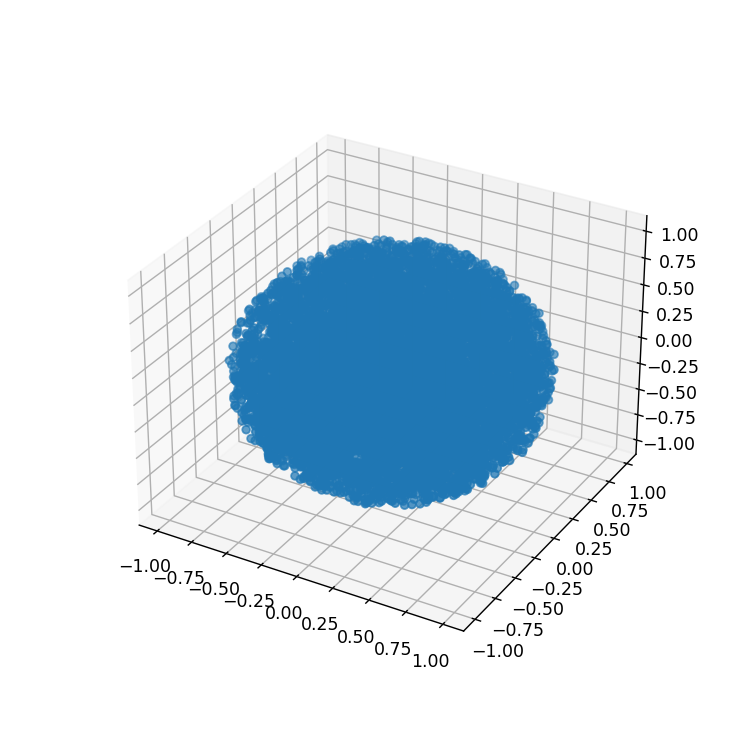

In [4]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Sphere[:,0],Sphere[:,1],Sphere[:,2])


In [5]:
def InSphere(x,y,z):
    if x**2+y**2+z**2 <=1:
        return True
    else:
        return False

In [6]:
xi= np.random.uniform(low=-1,high=1,size=1000000)
yi = np.random.uniform(low=-1,high=1,size=1000000)
zi = np.random.uniform(low=-1,high=1,size=1000000)

In [7]:
puntos_insphere = 0

for i in range(1000000):
    x, y, z = xi[i], yi[i], zi[i]
    if InSphere(x, y, z):
        puntos_insphere += 1
        
puntos_insphere

523261

In [53]:
def Ixx(yi,zi):
    sum = 0
    for i in range(1000000):
        x, y, z = xi[i], yi[i], zi[i]
        if InSphere(x, y, z):
            sum += np.sum(yi[i]**2+ zi[i]**2)
    Ixx =sum/puntos_insphere
    return Ixx
    
def Iyy(xi,zi):
    sum = 0 
    for i in range(1000000):
        x, y, z = xi[i], yi[i], zi[i]
        if InSphere(x, y, z):
            sum += np.sum(xi[i]**2+ zi[i]**2)
    Iyy =sum/puntos_insphere
    return Iyy
    
def Izz(yi,xi):
    sum = 0 
    for i in range(1000000):
        x, y, z = xi[i], yi[i], zi[i]
        if InSphere(x, y, z):
            sum += np.sum(yi[i]**2+ xi[i]**2)
    Izz =sum/puntos_insphere
    return Izz
    
print("Ixx = ", round(Ixx(yi,zi),4))
print("Iyy = ", round(Iyy(xi,zi),4))
print("Izz = ", round(Izz(yi,xi),4))

Ixx =  0.4001
Iyy =  0.4002
Izz =  0.3999


In [58]:
def Ixy(yi,xi):
    sum = 0 
    for i in range(1000000):
        x, y, z = xi[i], yi[i], zi[i]
        if InSphere(x, y, z):
            sum += yi[i]*xi[i]
    Ixy = (-1)*sum/puntos_insphere
    return Ixy

print("Ixy = ", round(Ixy(xi,yi),3))

Ixy =  -0.0


El momento de inercia en Ixy debe ser igual a 0, porque la esfera es invariante frente a rotaciones, esto lo podemos ver al sacar Ixx, Iyy,Izz son iguales. Que el momento de inercia Ixy sea 0 representa esto mismo, pues en caso de no ser 0 podriamos encontrar un eje preferente de rotación de la esfera.